<a href="https://colab.research.google.com/github/asha-murthy/DataScientist/blob/main/Netflix_Data_Exploration_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing Libraries , Loading the data and Basic Observations

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.shape

(8807, 12)

There are total 8807 rows and 12 columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.nunique()

,0
show_id,8807
type,2
title,8807
director,4528
cast,7692
country,748
date_added,1767
release_year,74
rating,17
duration,220


These are total features of our dataset. It is seen that show_id column has all unique values, Title column has all unique values i.e. total 8807 which equates with total rows in the dataset. Hence It can be concluded that ,

Total 8807 movies/TV shows data is provided in the dataset.

In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.describe(include = object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


# 2. Data Cleaning

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


Converting the data type from object to datetime64

In [ ]:
#df['date_added'] = pd.to_datetime(df['date_added'])
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.fillna({'rating':'Unavailable', 'cast':'Unavailable', 'director':'Unavailable', 'country' : 'Unavailable'},inplace = True)
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,0
duration,3


In [ ]:
df[df.date_added.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unavailable,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,Unavailable,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,Unavailable,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,Unavailable,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,Unavailable,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,Unavailable,Igor Dmitriev,Unavailable,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,Unavailable,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,Unavailable,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,Unavailable,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,Unavailable,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [ ]:
most_recent_entry_date= df['date_added'].max()
df.fillna({'date_added': most_recent_entry_date}, inplace = True)

In [ ]:
df[df.show_id == 's6067']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unavailable,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,2021-09-25,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [ ]:
df[df.duration.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
df[df.director=='Louis C.K.']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
df.loc[df['director']=='Louis C.K.','duration'] = df['rating']
df[df.director=='Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
df.loc[df['director'] == 'Louis C.K.', 'rating'] = 'Unavailable'
df[df.director == 'Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,Unavailable,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,Unavailable,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,Unavailable,66 min,Movies,The comic puts his trademark hilarious/thought...


# 3. Data Exploration and Non Graphical Analysis

In [ ]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

2 types of content present in dataset -  Movie and TV Show

In [ ]:
df.type.value_counts()

,count
type,
Movie,6131
TV Show,2676


On Netflix there are more number of movies compared to TV Shows.





In [ ]:
movies  = df.loc[df['type'] == 'Movie']
tv_shows = df.loc[df['type'] == 'TV Show']

In [ ]:
movies.duration.value_counts()

,count
duration,
90 min,152
97 min,146
94 min,146
93 min,146
91 min,144
...,...
228 min,1
18 min,1
205 min,1


In [ ]:
tv_shows.duration.value_counts()

,count
duration,
1 Season,1793
2 Seasons,425
3 Seasons,199
4 Seasons,95
5 Seasons,65
6 Seasons,33
7 Seasons,23
8 Seasons,17
9 Seasons,9


Since movie and TV shows both have different format for duration, we can change duration for movies as minutes & TV shows as seasons

In [ ]:
movies['duration'] = movies['duration'].str.replace(' min', '')
movies['duration'] = pd.to_numeric(movies['duration'], errors='coerce')
movies['duration'] = movies['duration'].astype('float')

In [ ]:
tv_shows['duration'] = tv_shows.duration.str[:-7].apply(lambda x : x.strip())
tv_shows['duration'] = tv_shows['duration'].astype('float')

In [ ]:
tv_shows.rename({'duration': 'duration_in_seasons'} ,axis = 1 , inplace = True)
movies.rename({'duration': 'duration_in_minutes'} ,axis = 1 , inplace = True)

In [ ]:
tv_shows.duration_in_seasons

,duration_in_seasons
1,2.0
2,1.0
3,1.0
4,2.0
5,1.0
...,...
8795,2.0
8796,2.0
8797,3.0
8800,1.0


In [ ]:
movies.duration_in_minutes

,duration_in_minutes
0,90.0
6,91.0
7,125.0
9,104.0
12,127.0
...,...
8801,96.0
8802,158.0
8804,88.0
8805,88.0


when is the most recent movie added on netflix as per data i.e. dataset duration

In [ ]:
timeperiod = pd.Series((df['date_added'].min().strftime('%B %Y') , df['date_added'].max().strftime('%B %Y')))
timeperiod.index = ['first' , 'Most Recent']
timeperiod

,0
first,January 2008
Most Recent,September 2021


The oldest and the most recent movie/TV show released on the Netflix in which year?

In [ ]:
df.release_year.min(), df.release_year.max()

(1925, 2021)

In [ ]:
df.loc[(df.release_year == df.release_year.min()) | (df.release_year == df.release_year.max())].sort_values('release_year')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,Unavailable,Unavailable,Unavailable,2018-12-30,1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...
2920,s2921,TV Show,Love Is Blind,Unavailable,"Nick Lachey, Vanessa Lachey",United States,2020-02-13,2021,TV-MA,1 Season,"Reality TV, Romantic TV Shows",Nick and Vanessa Lachey host this social exper...
1696,s1697,TV Show,Polly Pocket,Unavailable,"Emily Tennant, Shannon Chan-Kent, Kazumi Evans...","Canada, United States, Ireland",2020-11-15,2021,TV-Y,2 Seasons,Kids' TV,After uncovering a magical locket that allows ...
1551,s1552,TV Show,Hilda,Unavailable,"Bella Ramsey, Ameerah Falzon-Ojo, Oliver Nelso...","United Kingdom, Canada, United States",2020-12-14,2021,TV-Y7,2 Seasons,Kids' TV,"Fearless, free-spirited Hilda finds new friend..."
1468,s1469,Movie,What Happened to Mr. Cha?,Kim Dong-kyu,"Cha In-pyo, Cho Dal-hwan, Song Jae-ryong",South Korea,2021-01-01,2021,TV-MA,102 min,"Comedies, International Movies","With the peak of his career long behind him, a..."
...,...,...,...,...,...,...,...,...,...,...,...,...
30,s31,Movie,Ankahi Kahaniya,"Ashwiny Iyer Tiwari, Abhishek Chaubey, Saket C...","Abhishek Banerjee, Rinku Rajguru, Delzad Hiwal...",Unavailable,2021-09-17,2021,TV-14,111 min,"Dramas, Independent Movies, International Movies","As big city life buzzes around them, lonely so..."
25,s26,TV Show,Love on the Spectrum,Unavailable,Brooke Satchwell,Australia,2021-09-21,2021,TV-14,2 Seasons,"Docuseries, International TV Shows, Reality TV",Finding love can be hard for anyone. For young...
23,s24,Movie,Go! Go! Cory Carson: Chrissy Takes the Wheel,"Alex Woo, Stanley Moore","Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...",Unavailable,2021-09-21,2021,TV-Y,61 min,Children & Family Movies,From arcade games to sled days and hiccup cure...
20,s21,TV Show,Monsters Inside: The 24 Faces of Billy Milligan,Olivier Megaton,Unavailable,Unavailable,2021-09-22,2021,TV-14,1 Season,"Crime TV Shows, Docuseries, International TV S...","In the late 1970s, an accused serial rapist cl..."


Which are different ratings available on Netflix in each type of content? Check the number of content released in each type.

In [ ]:
df.groupby(['type', 'rating'])['show_id'].count()

type     rating     
Movie    G                41
         NC-17             3
         NR               75
         PG              287
         PG-13           490
         R               797
         TV-14          1427
         TV-G            126
         TV-MA          2062
         TV-PG           540
         TV-Y            131
         TV-Y7           139
         TV-Y7-FV          5
         UR                3
         Unavailable       5
TV Show  NR                5
         R                 2
         TV-14           733
         TV-G             94
         TV-MA          1145
         TV-PG           323
         TV-Y            176
         TV-Y7           195
         TV-Y7-FV          1
         Unavailable       2
Name: show_id, dtype: int64

In [ ]:
df['country'].value_counts()

,count
country,
United States,2818
India,972
Unavailable,831
United Kingdom,419
Japan,245
...,...
"Germany, Canada, United States",1
"Denmark, United Kingdom, South Africa, Sweden, Belgium",1
"Serbia, South Korea, Slovenia",1


We see that many movies are produced in more than 1 country. Hence, the country column has comma separated values of countries.

This makes it difficult to analyse how many movies were produced in each country. We can use explode function in pandas to split the country column into different rows.

we are Creating a separate table for country , to avoid the duplicasy of records in our origional table after exploding.

In [ ]:
country_tb = df[['show_id' , 'type' , 'country']]
country_tb['country'] = country_tb['country'].apply(lambda x : x.split(', '))
country_tb = country_tb.explode('country')
country_tb

,show_id,type,country
0,s1,Movie,United States
1,s2,TV Show,South Africa
2,s3,TV Show,Unavailable
3,s4,TV Show,Unavailable
4,s5,TV Show,India
...,...,...,...
8802,s8803,Movie,United States
8803,s8804,TV Show,Unavailable
8804,s8805,Movie,United States
8805,s8806,Movie,United States


In [ ]:
country_tb['country'].nunique()

128

Netflix has movies in 128 countries

Total movies and tv shows in each country

In [ ]:
x = country_tb.groupby(['type', 'country'])['show_id'].count().reset_index()
x.pivot(index = ['country'] , columns = 'type' , values = 'show_id').sort_values('Movie',ascending = False)

type,Movie,TV Show
country,,
United States,2751.0,938.0
India,962.0,84.0
United Kingdom,532.0,272.0
Unavailable,440.0,391.0
Canada,319.0,126.0
...,...,...
Azerbaijan,NaN,1.0
Belarus,NaN,1.0
Cuba,NaN,1.0


In [ ]:
country_tb['country'].value_counts()

,count
country,
United States,3689
India,1046
Unavailable,831
United Kingdom,804
Canada,445
...,...
Sudan,1
Panama,1
Uganda,1


United States has most number of content on the Netflix

In [ ]:
df['director'].value_counts()

,count
director,
Unavailable,2634
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Suhas Kadav,16
Marcus Raboy,16
...,...
"Milla Harrison-Hansley, Alicky Sussman",1
Drew Stone,1
Benjamin Turner,1


In [ ]:
dir_tb = df[['show_id' , 'type' , 'director']]
dir_tb = dir_tb[dir_tb['director']!='Unavailable']
dir_tb['director'] = dir_tb['director'].apply(lambda x : x.split(', '))
dir_tb = dir_tb.explode('director')
dir_tb

,show_id,type,director
0,s1,Movie,Kirsten Johnson
2,s3,TV Show,Julien Leclercq
5,s6,TV Show,Mike Flanagan
6,s7,Movie,Robert Cullen
6,s7,Movie,José Luis Ucha
...,...,...,...
8801,s8802,Movie,Majid Al Ansari
8802,s8803,Movie,David Fincher
8804,s8805,Movie,Ruben Fleischer
8805,s8806,Movie,Peter Hewitt


In [ ]:
dir_tb['director'].nunique()

4993

There are 4993 unique directors in Netflix

In [ ]:
x = dir_tb.groupby(['director' , 'type'])['show_id'].count().reset_index()
x.pivot(index= ['director'] , columns = 'type' , values = 'show_id').sort_values('Movie' ,ascending = False)

type,Movie,TV Show
director,,
Rajiv Chilaka,22.0,NaN
Jan Suter,21.0,NaN
Raúl Campos,19.0,NaN
Suhas Kadav,16.0,NaN
Marcus Raboy,15.0,1.0
...,...,...
Vijay S. Bhanushali,NaN,1.0
Wouter Bouvijn,NaN,1.0
YC Tom Lee,NaN,1.0


In [ ]:
genre_tb = df[['show_id' , 'type', 'listed_in']]

In [ ]:
genre_tb['listed_in'] = genre_tb['listed_in'].apply(lambda x : x.split(', '))
genre_tb = genre_tb.explode('listed_in')
genre_tb['listed_in'] = genre_tb['listed_in'].str.strip()
genre_tb

,show_id,type,listed_in
0,s1,Movie,Documentaries
1,s2,TV Show,International TV Shows
1,s2,TV Show,TV Dramas
1,s2,TV Show,TV Mysteries
2,s3,TV Show,Crime TV Shows
...,...,...,...
8805,s8806,Movie,Children & Family Movies
8805,s8806,Movie,Comedies
8806,s8807,Movie,Dramas
8806,s8807,Movie,International Movies


In [ ]:
genre_tb.listed_in.unique()

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

In [ ]:
genre_tb.listed_in.nunique()

42

Total 42 genres present in dataset

In [ ]:
df.merge(genre_tb , on = 'show_id' ).groupby(['type_x'])['listed_in_y'].nunique()

,listed_in_y
type_x,
Movie,20
TV Show,22


Movies have 20 genres and TV shows have 22 genres.

Total movies/TV shows in each genre

In [ ]:
x = genre_tb.groupby(['listed_in' , 'type'])['show_id'].count().reset_index()
x.pivot(index = 'listed_in' , columns = 'type' , values = 'show_id').sort_index()

type,Movie,TV Show
listed_in,,
Action & Adventure,859.0,NaN
Anime Features,71.0,NaN
Anime Series,NaN,176.0
British TV Shows,NaN,253.0
Children & Family Movies,641.0,NaN
Classic & Cult TV,NaN,28.0
Classic Movies,116.0,NaN
Comedies,1674.0,NaN
Crime TV Shows,NaN,470.0


In [ ]:
df.cast.value_counts()

,count
cast,
Unavailable,825
David Attenborough,19
"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil",14
Samuel West,10
Jeff Dunham,7
...,...
"Toyin Abraham, Sambasa Nzeribe, Chioma Chukwuka Akpotha, Chioma Omeruah, Chiwetalu Agu, Dele Odule, Femi Adebayo, Bayray McNwizu, Biodun Stephen",1
"Neeraj Kabi, Geetanjali Kulkarni, Danish Husain, Sheeba Chaddha, Paras Priyadarshan, Anshul Chauhan, Anud Singh Dhaka, Shirin Sewani, Mihir Ahuja, Vasundhara Rajput",1
"Sanjay Dutt, Arjun Kapoor, Kriti Sanon, Zeenat Aman, Mohnish Bahl, Padmini Kolhapure, Kunal Kapoor, Suhasini Mulay",1


In [ ]:
cast_tb = df[['show_id' , 'type' ,'cast']]
cast_tb = cast_tb[cast_tb['cast']!='Unavailable']
cast_tb['cast'] = cast_tb['cast'].apply(lambda x : x.split(', '))
cast_tb = cast_tb.explode('cast')
cast_tb

,show_id,type,cast
1,s2,TV Show,Ama Qamata
1,s2,TV Show,Khosi Ngema
1,s2,TV Show,Gail Mabalane
1,s2,TV Show,Thabang Molaba
1,s2,TV Show,Dillon Windvogel
...,...,...,...
8806,s8807,Movie,Manish Chaudhary
8806,s8807,Movie,Meghna Malik
8806,s8807,Movie,Malkeet Rauni
8806,s8807,Movie,Anita Shabdish


In [ ]:
cast_tb.cast.nunique()

36439

There are total 36439 actors on the Netflix

Total movies/TV shows by each actor

In [ ]:
x = cast_tb.groupby(['cast' , 'type'])['show_id'].count().reset_index()
x.pivot(index = 'cast' , columns = 'type' , values = 'show_id').sort_values('TV Show' , ascending = False)

type,Movie,TV Show
cast,,
Takahiro Sakurai,7.0,25.0
Yuki Kaji,10.0,19.0
Ai Kayano,2.0,17.0
Junichi Suwabe,4.0,17.0
Daisuke Ono,5.0,17.0
...,...,...
Şerif Sezer,1.0,NaN
Şevket Çoruh,1.0,NaN
Şinasi Yurtsever,3.0,NaN


# 4. Visual Analysis - Univariate & Bivariate

1.Distribution of content across the different types

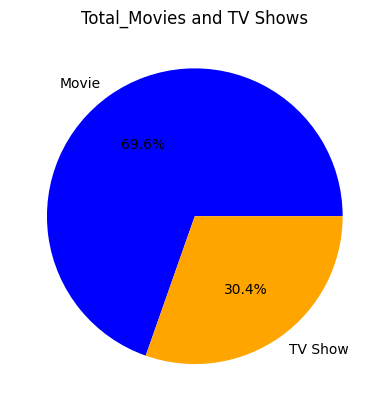

In [ ]:
types = df.type.value_counts()
plt.pie(types,  labels=types.index, autopct='%1.1f%%' , colors = ['blue' , 'orange'])
plt.title('Total_Movies and TV Shows')
plt.show()

It is observed that , around 70% content is Movies and around 30% content is TV shows.

 2.Distribution of Ratings

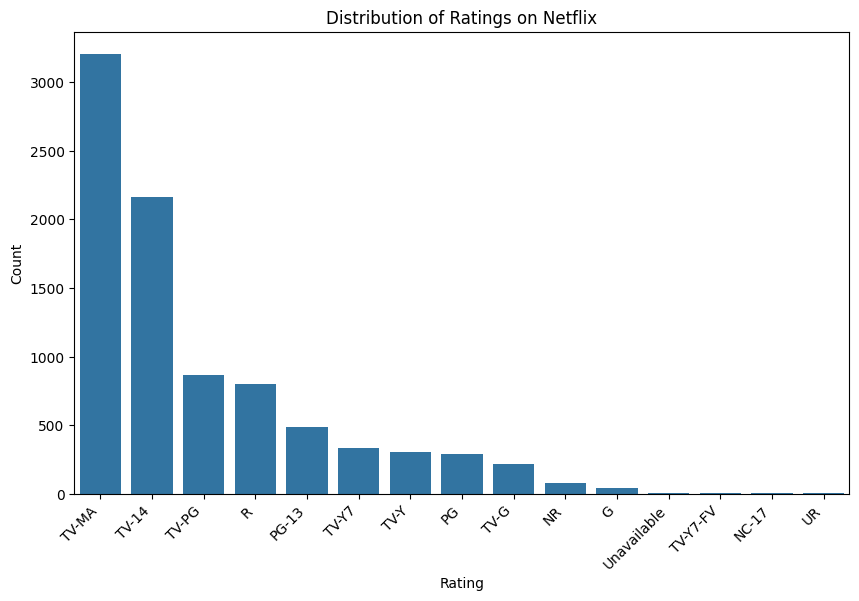

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index)
plt.title('Distribution of Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Observation: TV-MA has the highest number of ratings on the Netflix.

3.Distribution of 'Release_year' column

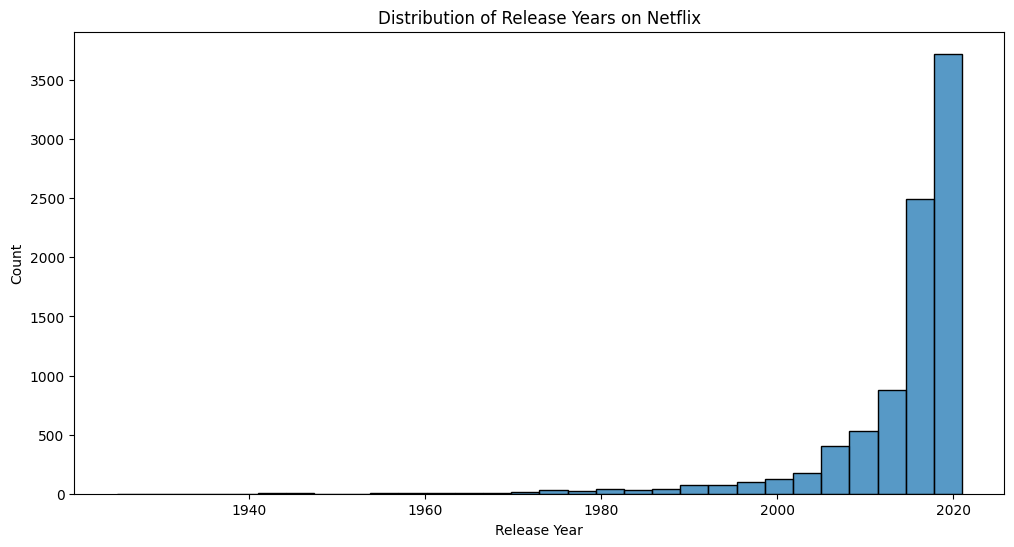

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['release_year'], bins=30)
plt.title('Distribution of Release Years on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()


4.How has the number of movies released per year changed over the last 20-30 years?

In [ ]:
d = df.groupby(['type' , 'release_year'])['show_id'].count().reset_index()
d.rename({'show_id' : 'total movies/TV shows'}, axis = 1 , inplace = True)
d

,type,release_year,total movies/TV shows
0,Movie,1942,2
1,Movie,1943,3
2,Movie,1944,3
3,Movie,1945,3
4,Movie,1946,1
...,...,...,...
114,TV Show,2017,265
115,TV Show,2018,380
116,TV Show,2019,397
117,TV Show,2020,436


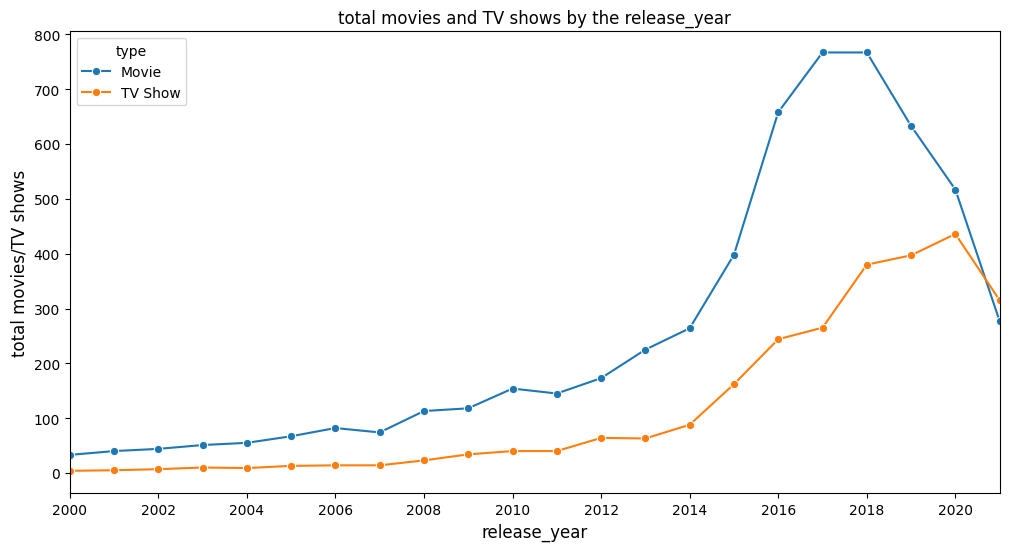

In [ ]:
plt.figure(figsize = (12,6))
sns.lineplot(data = d , x = 'release_year' , y = 'total movies/TV shows' , hue = 'type' , marker = 'o'  , ms = 6 )
plt.xlabel('release_year' , fontsize = 12)
plt.ylabel('total movies/TV shows' , fontsize = 12)
plt.title('total movies and TV shows by the release_year' , fontsize = 12)
plt.xlim( left = 2000 , right = 2021)
plt.xticks(np.arange(2000 , 2021 , 2))
plt.show()

Observation:

2018 marks the highest number of movie and TV show releases.
Since 2018, A drop in movies is seen and rise in TV shows is observed clearly, and TV shows surpasses the movies count in mid 2020.
In recent years TV shows are focussed more than Movies.
The yearly number of releases has surged drastically from 2015.

5.Total movies/TV shows by each director

In [ ]:
# total Movies directed by top 10 directors
top_10_dir = dir_tb.director.value_counts().head(10).index
df_new = dir_tb.loc[dir_tb['director'].isin(top_10_dir)]

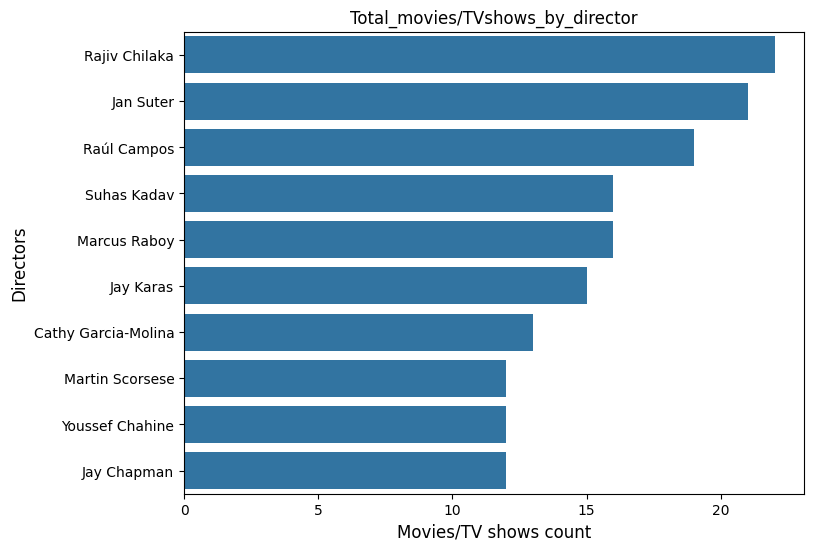

In [ ]:
plt.figure(figsize= (8 , 6))
sns.countplot(data = df_new , y = 'director' , order = top_10_dir , orient = 'v')
plt.xlabel('total_movies/TV shows' , fontsize = 12)
plt.xlabel('Movies/TV shows count')
plt.ylabel('Directors' , fontsize = 12)
plt.title('Total_movies/TVshows_by_director')
plt.show()

Observation:

The top 3 directors on Netflix in terms of count of movies directed by them are - Rajiv Chilaka, Jan Suter, Raúl Campos

6.Total movies/TV shows by each country

In [ ]:
# Lets check for top 10 countries
top_10_country = country_tb.country.value_counts().head(10).index
df_new = country_tb.loc[country_tb['country'].isin(top_10_country)]

In [ ]:
x = df_new.groupby(['country' , 'type'])['show_id'].count().reset_index()
x.pivot(index = 'country' , columns = 'type' , values = 'show_id').sort_values('Movie',ascending = False)

type,Movie,TV Show
country,,
United States,2751,938
India,962,84
United Kingdom,532,272
Unavailable,440,391
Canada,319,126
France,303,90
Germany,182,44
Spain,171,61
Japan,119,199


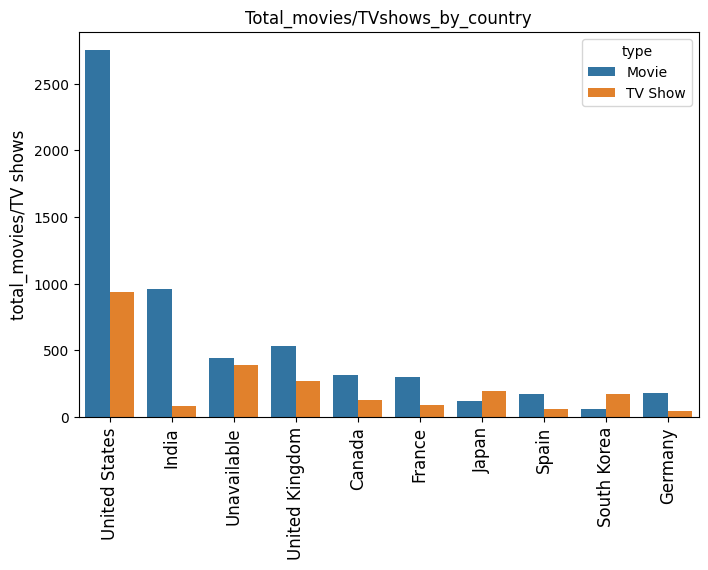

In [ ]:
plt.figure(figsize= (8,5))
sns.countplot(data = df_new , x = 'country' , order = top_10_country , hue = 'type')
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('total_movies/TV shows' , fontsize = 12)
plt.xlabel('')
plt.title('Total_movies/TVshows_by_country')
plt.show()

7.Total Content produced in each country

In [ ]:
top_10_country = country_tb.country.value_counts().head(10).index
country_tb['cat'] = country_tb['country'].apply(lambda x : x if x in top_10_country else 'Other Countries' )

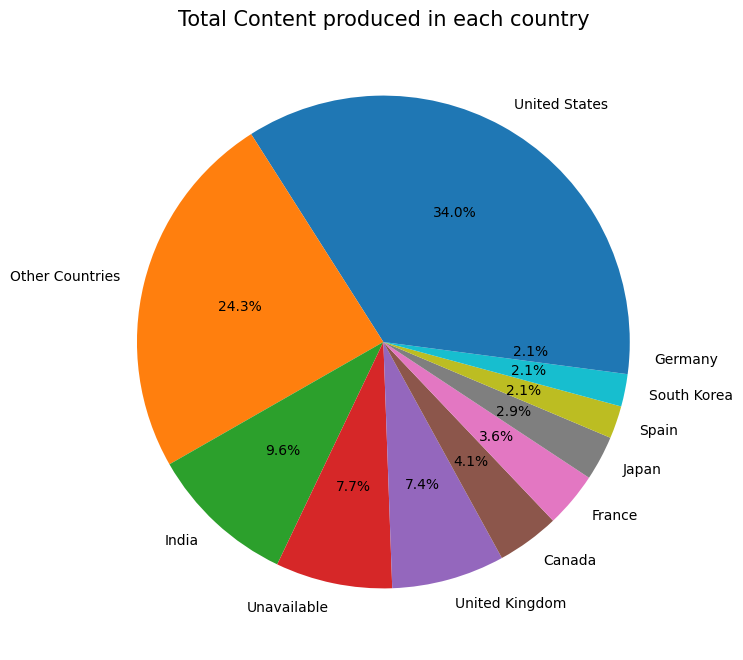

In [ ]:
x = country_tb.cat.value_counts()

plt.figure(figsize = (8,8))
plt.pie(x , labels = x.index, autopct='%1.1f%%')
plt.title('Total Content produced in each country' , fontsize = 15)
plt.show()

Observation:
United States is the HIGHEST contributor country on Netflix, followed by India and United Kingdom.
Maximum content of Netflix which is around 75% , is coming from these top 10 countries. Rest of the world only contributes 25% of the content.

 8.Total content distribution by release year of the content

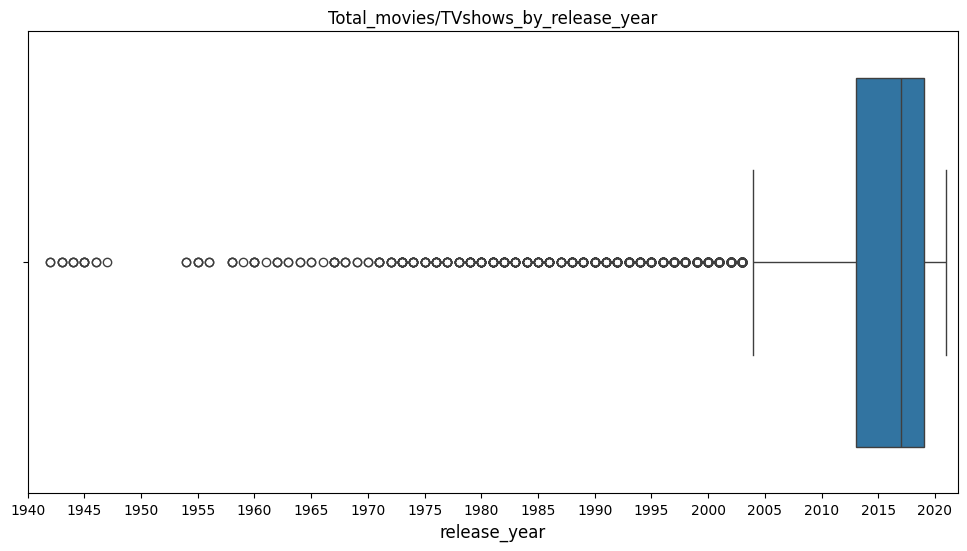

In [ ]:
plt.figure(figsize= (12,6))
sns.boxplot(data = df , x = 'release_year')
plt.xlabel('release_year' , fontsize = 12)
plt.title('Total_movies/TVshows_by_release_year')
plt.xticks(np.arange(1940 , 2021 , 5))
plt.xlim((1940 , 2022))
plt.show()

Netflix have major content which is released in the year range 2000-2020
It seems that the content older than year 2000 is almost missing from the Netflix.

Total movies/TV shows distribution by rating of the content

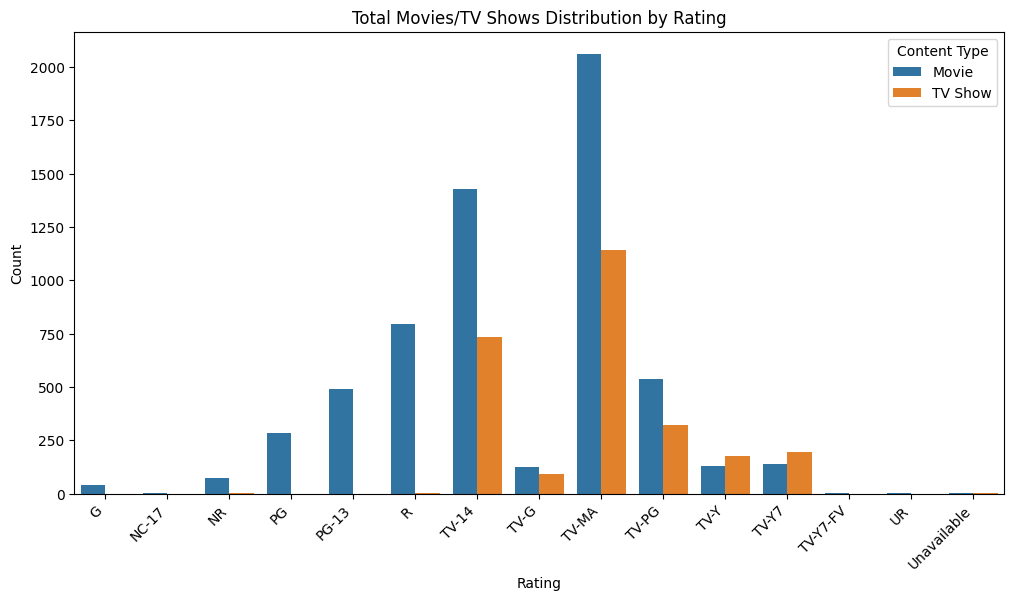

In [ ]:
rating_distribution = df.groupby(['rating', 'type'])['show_id'].count().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='show_id', hue='type', data=rating_distribution)
plt.title('Total Movies/TV Shows Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Content Type')
plt.show()

 Total movies/TV shows in each Genre

In [ ]:
# Lets check the count for top 10 genres in Movies and TV_shows
top_10_movie_genres = genre_tb[genre_tb['type'] == 'Movie'].listed_in.value_counts().head(10).index
df_movie = genre_tb.loc[genre_tb['listed_in'].isin(top_10_movie_genres)]

In [ ]:
top_10_TV_genres = genre_tb[genre_tb['type'] == 'TV Show'].listed_in.value_counts().head(10).index
df_tv = genre_tb.loc[genre_tb['listed_in'].isin(top_10_TV_genres)]

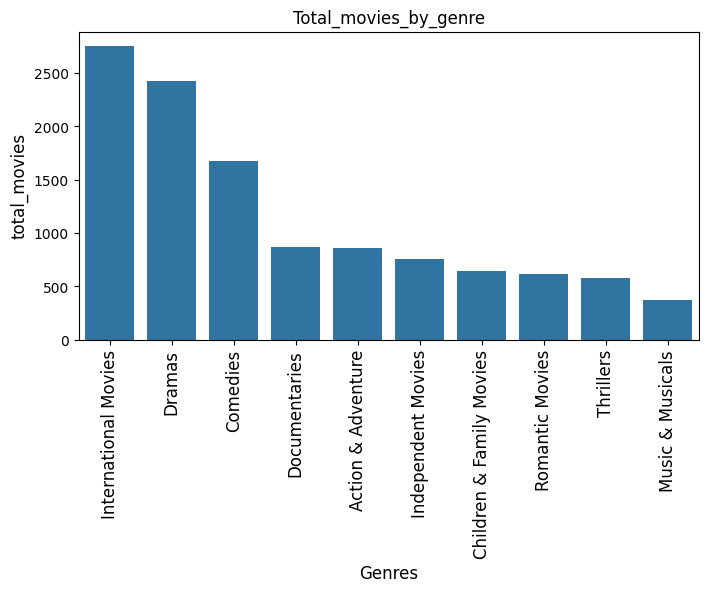

In [ ]:
plt.figure(figsize= (8,4))
sns.countplot(data = df_movie , x = 'listed_in' , order = top_10_movie_genres)
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('total_movies' , fontsize = 12)
plt.xlabel('Genres' , fontsize = 12)
plt.title('Total_movies_by_genre')
plt.show()

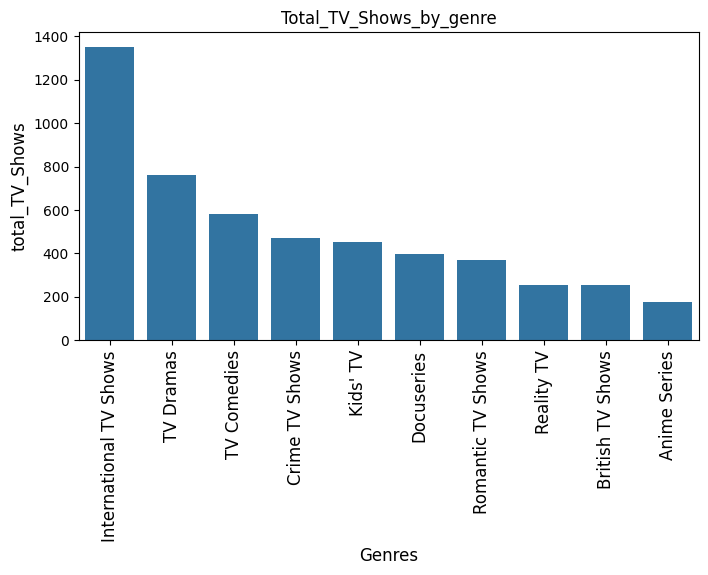

In [ ]:
plt.figure(figsize= (8,4))
sns.countplot(data = df_tv , x = 'listed_in' , order = top_10_TV_genres)
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('total_TV_Shows' , fontsize = 12)
plt.xlabel('Genres' , fontsize = 12)
plt.title('Total_TV_Shows_by_genre')
plt.show()

International Movies and TV Shows , Dramas , and Comedies are the top 3 genres on Netflix for both Movies and TV shows.

Popular genres in top 10 countries

In [ ]:

top_10_country = country_tb.loc[country_tb['country'].isin(top_10_country)]

In [ ]:
x = top_10_country.merge(genre_tb , on = 'show_id').drop_duplicates()
country_genre = x.groupby([ 'country' , 'listed_in'])['show_id'].count().sort_values(ascending = False).reset_index()
country_genre = country_genre.pivot(index = 'listed_in' , columns = 'country' , values = 'show_id')

Text(0.5, 1.0, 'Countries V/s Genres')

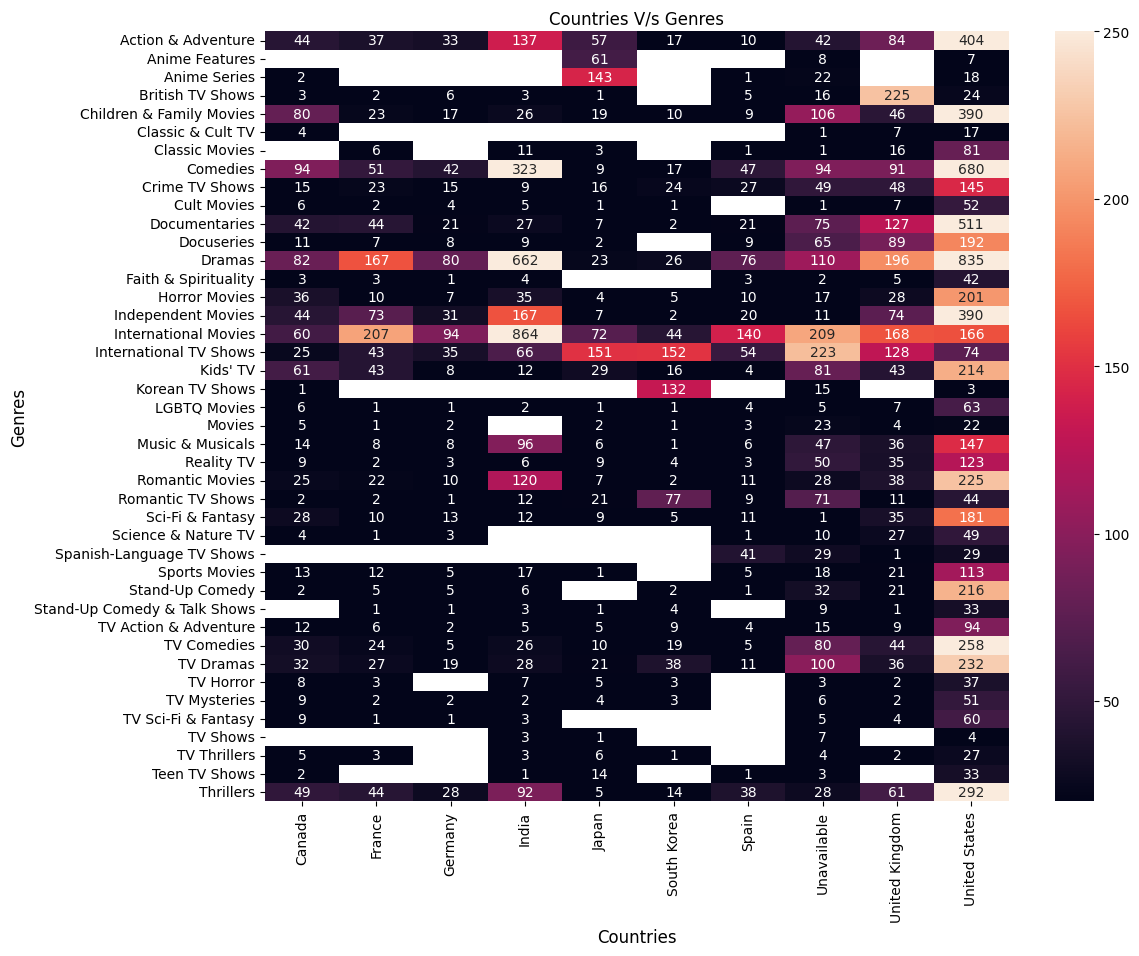

In [ ]:
plt.figure(figsize = (12,10))
sns.heatmap(data = country_genre , annot = True , fmt=".0f" , vmin = 20 , vmax = 250 )
plt.xlabel('Countries' , fontsize = 12)
plt.ylabel('Genres' , fontsize = 12)
plt.title('Countries V/s Genres' , fontsize = 12)

Popular genres across countries: Action & Adventure, Children & Family Movies, Comedies, Dramas, International Movies & TV Shows, TV Dramas, Thrillers

Country-specific genres: Korean TV shows (Korea), British TV Shows (UK), Anime features and Anime series (Japan), Spanish TV Shows (Argentina, Mexico and Spain)

United States and UK have a good mix of almost all genres.

Maximum International movies are produced in India.

Country-wise Rating of Content

In [ ]:
x = top_10_country.merge(df , on = 'show_id').groupby(['country_x' , 'rating'])['show_id'].count().reset_index()

In [ ]:
country_rating = x.pivot(index = ['country_x'] , columns = 'rating' , values = 'show_id')

Text(0.5, 1.0, 'Countries V/s Rating')

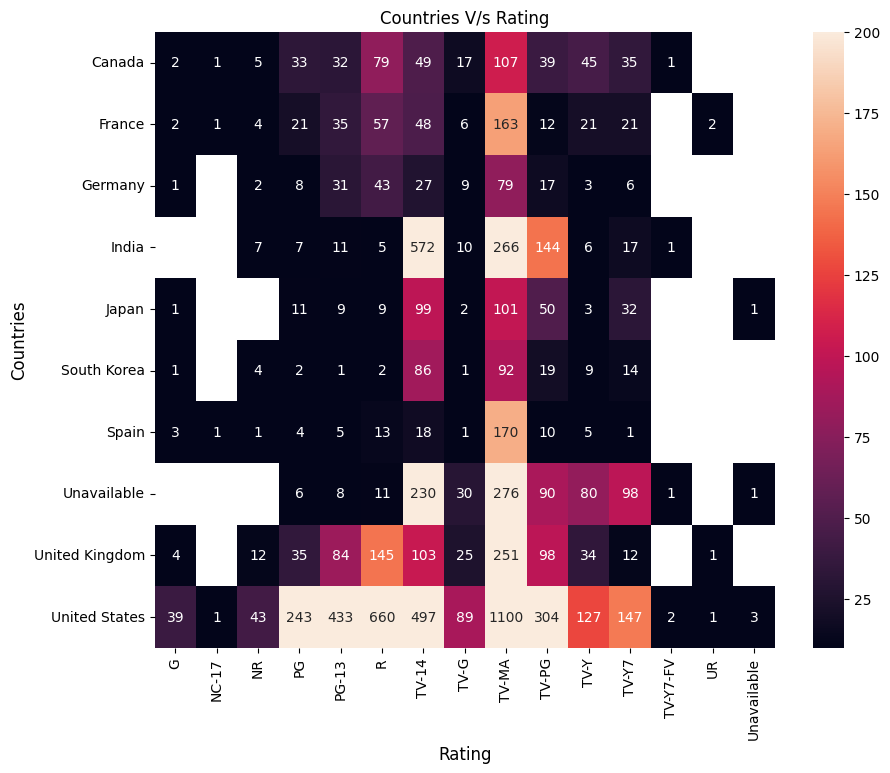

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(data = country_rating , annot = True , fmt=".0f"  , vmin = 10 , vmax=200)
plt.ylabel('Countries' , fontsize = 12)
plt.xlabel('Rating' , fontsize = 12)
plt.title('Countries V/s Rating' , fontsize = 12)

Overall, Netflix has an large amount of adult content across all countries (TV-MA & TV-14).
India also has many titles rated TV-PG, other than TV-MA & TV-14.
Only US, Canada, UK, France and Japan have content for young audiences (TV-Y & TV-Y7).
There is scarce content for general audience (TV-G & G) across all countries except US.

The top actors by country

In [ ]:
x = cast_tb.merge(country_tb , on = 'show_id').drop_duplicates()
x = x.groupby(['country' , 'cast'])['show_id'].count().reset_index()
x.loc[x['country'].isin(['United States'])].sort_values('show_id' , ascending = False).head(5)


,country,cast,show_id
52317,United States,Samuel L. Jackson,22
53392,United States,Tara Strong,22
44440,United States,Fred Tatasciore,21
39705,United States,Adam Sandler,20
45651,United States,James Franco,19


In [ ]:
country_list = ['India'  , 'United Kingdom' , 'Canada' , 'France' , 'Japan']
top_5_actors = x.loc[x['country'].isin(['United States'])].sort_values('show_id' , ascending = False).head(5)

In [ ]:
for i in country_list:
    new = x.loc[x['country'].isin([i])].sort_values('show_id' , ascending = False).head(5)
    top_5_actors = pd.concat( [top_5_actors , new] , ignore_index = True)

In [ ]:
# top 5 actors in top countries and their movies/tv shows count
top_5_actors

,country,cast,show_id
0,United States,Samuel L. Jackson,22
1,United States,Tara Strong,22
2,United States,Fred Tatasciore,21
3,United States,Adam Sandler,20
4,United States,James Franco,19
5,India,Anupam Kher,40
6,India,Shah Rukh Khan,34
7,India,Naseeruddin Shah,31
8,India,Akshay Kumar,29
9,India,Om Puri,29


<Axes: xlabel='show_id', ylabel='cast'>

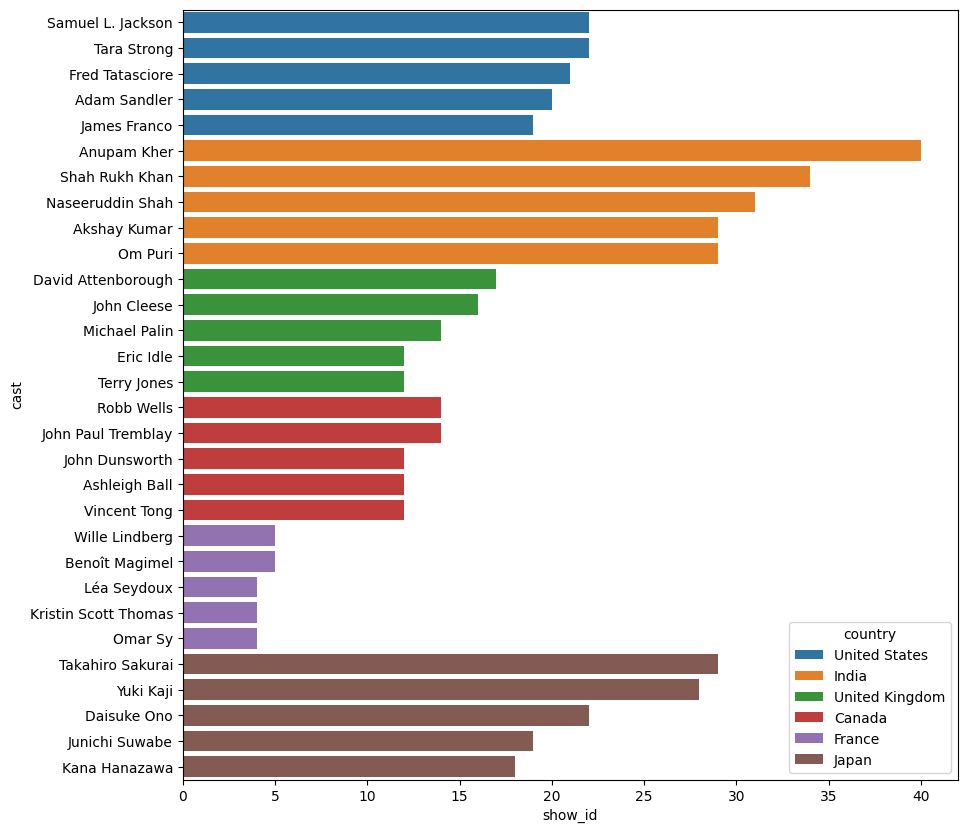

In [ ]:
plt.figure(figsize = (10,10))
sns.barplot(data = top_5_actors , y = 'cast' , x = 'show_id' , hue = 'country')

 Top 5 directors by Genre

In [ ]:
genre_list = [ 'Children & Family Movies', 'Comedies','Dramas', 'International Movies', 'Documentaries' ,
              'International TV Shows', 'Sci-Fi & Fantasy', 'Thrillers', 'Horror Movies']

x = dir_tb.merge(genre_tb , on = 'show_id').groupby([ 'listed_in' , 'director',])['show_id'].count().reset_index()

top_5_dir = x.loc[x['listed_in'] == 'Action & Adventure'].sort_values('show_id' , ascending = False).head()

for i in genre_list:
    new = x.loc[x['listed_in'] == i].sort_values('show_id' , ascending = False).head()
    top_5_dir = pd.concat([top_5_dir , new])

top_5_dir

,listed_in,director,show_id
147,Action & Adventure,Don Michael Paul,9
215,Action & Adventure,Hidenori Inoue,7
550,Action & Adventure,S.S. Rajamouli,7
651,Action & Adventure,Toshiya Shinohara,7
398,Action & Adventure,McG,5
1215,Children & Family Movies,Rajiv Chilaka,22
1303,Children & Family Movies,Suhas Kadav,16
1211,Children & Family Movies,Prakash Satam,7
1241,Children & Family Movies,Robert Rodriguez,7
1295,Children & Family Movies,Steven Spielberg,6


Top 5 genres in each country

In [ ]:
x = genre_tb.merge(country_tb , on = 'show_id').drop_duplicates()
x = x.groupby(['country' , 'listed_in'])['show_id'].count().reset_index()
x.loc[x['country'] == 'United States'].sort_values('show_id' , ascending = False).head(5)

country_list = ['India'  , 'United Kingdom' , 'Canada' , 'France' , 'Japan']
top_5_genre = x.loc[x['country'].isin(['United States'])].sort_values('show_id' , ascending = False).head(5)

for i in country_list:
    new = x.loc[x['country'] == i].sort_values('show_id' , ascending = False).head(5)
    top_5_genre = pd.concat( [top_5_genre , new] , ignore_index = True)


In [ ]:
top_5_genre

,country,listed_in,show_id
0,United States,Dramas,835
1,United States,Comedies,680
2,United States,Documentaries,511
3,United States,Action & Adventure,404
4,United States,Children & Family Movies,390
5,India,International Movies,864
6,India,Dramas,662
7,India,Comedies,323
8,India,Independent Movies,167
9,India,Action & Adventure,137


Variation in duration of movies by Release year

(0.0, 200.0)

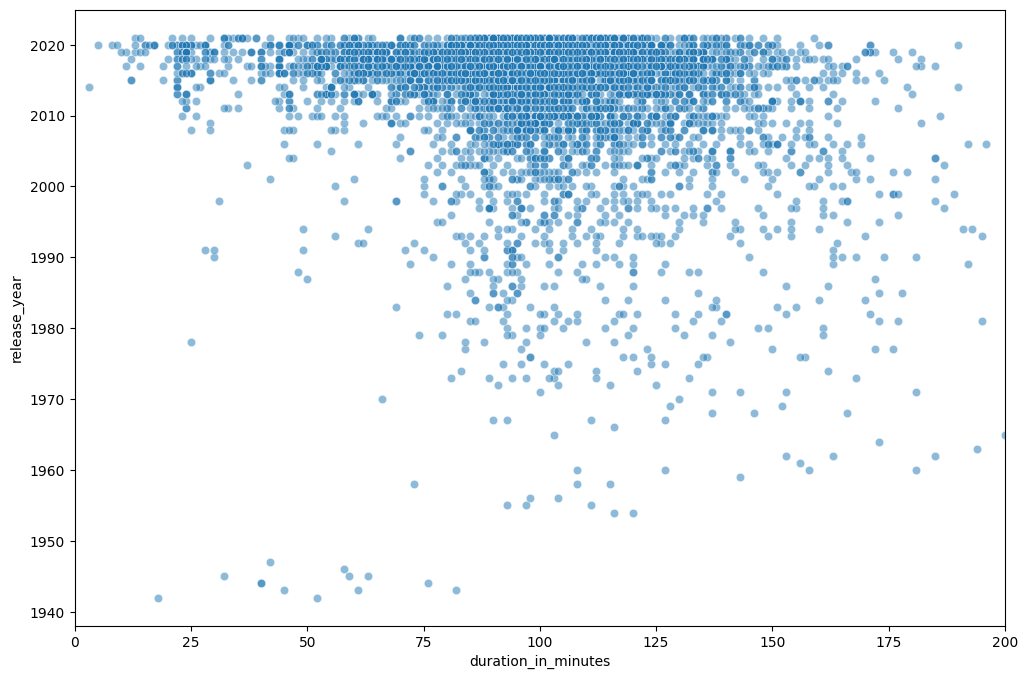

In [ ]:
plt.figure(figsize = (12,8))
#sns.scatterplot(movies['duration_in_minutes'], movies['release_year'],  alpha=0.5)
sns.scatterplot(x='duration_in_minutes', y='release_year', data=movies, alpha=0.5)
plt.xlim((0,200))

Observation
The movies shorter than 150 minutes duration have increased drastically after 2000 while movies longer than 150 minutes are not much popular.
There is a huge surge in the number of shorter duration movies (less than 75 mins) post 2010. Overall, Short movies have been popular in last 10 years.

What is the best time of the year when maximum content get added on the Netflix?

In [ ]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()
month_year = df.groupby(['year_added' , 'month_added'])['show_id'].count().reset_index()

Text(0.5, 1.0, 'Year and Month of Adding Shows on Netflix')

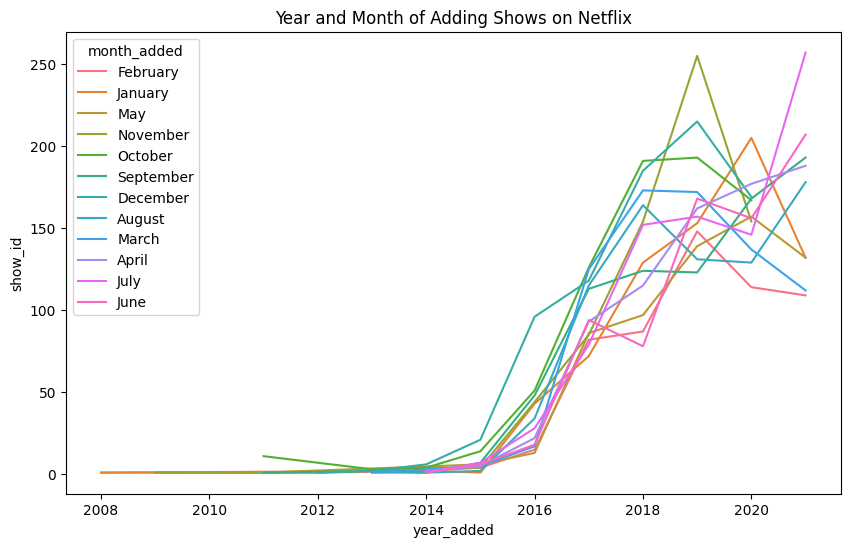

In [ ]:
plt.figure(figsize = (10,6))
sns.lineplot(data=month_year, x = 'year_added', y = 'show_id', hue='month_added')
plt.title('Year and Month of Adding Shows on Netflix')

The number of shows getting added is increasing with each year until 2020.
Also, months in the last quarter of the year (Oct-Dec) have more shows being added than the other months of the year. This could be because US has its festive season in Dec and India also has Diwali in Oct-Nov.

 Which countries are adding more number of content over the time?

In [ ]:
country_list = country_tb.country.value_counts().head(12).index
top_12_country = country_tb.loc[country_tb['country'].isin(country_list)]
country_year = top_12_country.merge(df , on = 'show_id')[['show_id','country_x' ,'type_x' , 'year_added' ]]
country_year.columns = ['show_id', 'country', 'type', 'year_added']

In [ ]:
country_year = country_year.groupby(['country' , 'year_added'])['show_id'].count().reset_index()

<Axes: xlabel='year_added', ylabel='show_id'>

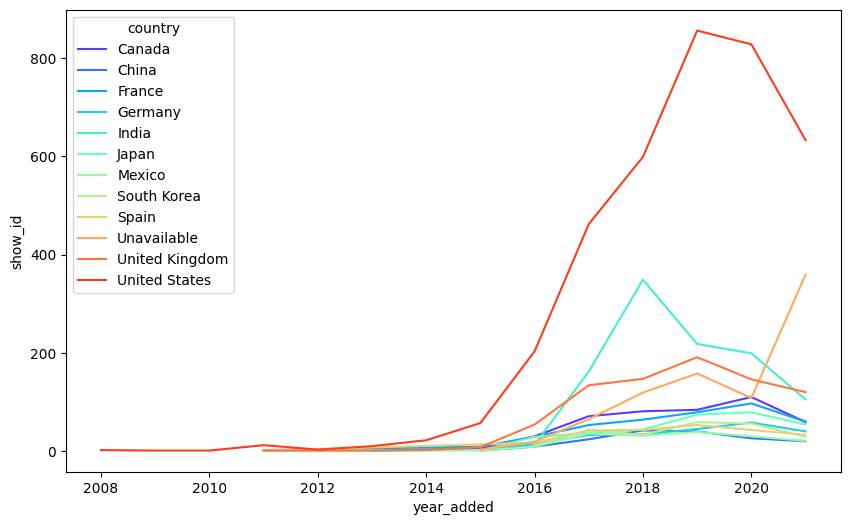

In [ ]:
plt.figure(figsize = (10,6))
sns.lineplot(data = country_year , x = 'year_added' , y = 'show_id' , hue = 'country' , palette ='rainbow' )


Observation : United Stated have always added highset number of movies/TV shows over the time. Since 2016, India has seen spike in popularity of content and added more number of content, followed by United Kingdom at 3rd position.

# **Insights based on Non-Graphical and Visual Analysis**

Around 70% of the content on Netflix is Movies and around 30% of the content is TV shows.

The movies and TV shows uploaded on Netflix started from the year 2008, It had very little content till 2014.

The year 2015 marks a drastic surge in the amount of content uploaded to Netflix. It continued the uptrend since then and 2019 marks the highest number of movies and TV shows added on Netflix. The years 2020 and 2021 have seen a drop in content added on Netflix, possibly because of the Pandemic. But still, TV show content has not dropped as drastic as movies.

Since 2018, A drop in the movies is seen, but a rise in TV shows is observed clearly. Being in a continuous uptrend, TV shows surpassed the movie count in mid-2020. It shows the rise in popularity of TV shows in recent years.

Netflix has movies from a variety of directors. Around 4993 directors have their movies or TV shows on Netflix

Netflix has movies from a total of 122 countries, the United States being the highest contributor with almost 37% of all the content.

The release year for shows is concentrated in the range 2005-2021.

Various ratings of content are available on Netflix, for various viewers categories like kids, adults, and families. The highest number of movies and TV shows are rated TV-MA (for mature audiences).

Content in most of the ratings is available in lesser quantity except in the US. Ratings like TV-Y7, TV-Y7 FV, PG, TV-G, G, TV-Y, and TV-PG are very little available in all countries except the US.

International Movies and TV Shows, Dramas, and Comedies are the top 3 genres on Netflix for both Movies and TV shows.

Mostly country-specific popular genres are observed in each country. Only the United States has a good mix of almost all genres. Eg. Korean TV shows (Korea), British TV Shows (UK), Anime features, Anime series (Japan), and so on.

Indian Actors have acted in the maximum number of movies on Netflix. The top 5 actors are in India based on quantity of movies.

Shorter duration movies have been popular in the last 10 years.





# **Business Insights**

Netflix has the majority of content which is released after the year 2000. It is observed that content older than the year 2000 is very scarce on Netflix. Senior Citizens could be the target audience for such content, which is almost missing currently.

Maximum content (more than 80%) is
TV-MA - Content intended for mature audiences aged 17 and above.
TV-14 - Content suitable for viewers aged 14 and above.
TV-PG - Parental guidance suggested (similar ratings - PG-13 , PG)
R - Restricted Content, that may not be suitable for viewers under age 17.
These ratings' movies target Mature and Adult audiences. The rest 20 % of the content is for kids aged below 13. It shows that Netflix is currently serving mostly Mature audiences or Children with parental guidance.

Most popular genres on Netflix are International Movies and TV Shows, Dramas, Comedies, Action & Adventure, Children & Family Movies, and Thrillers.

Maximum content of Netflix which is around 75%, is coming from the top 10 countries. The rest of the world only contributes 25% of the content. More countries can be focussed in the future to grow the business.

Liking towards the shorter duration content is on the rise. (duration 75 to 150 minutes and seasons 1 to 3) This can be considered while production of new content on Netflix.

Drop in content is seen across all the countries and types of content in the years 2020 and 2021, possibly because of the Pandemic



# **Recommendations**

Very limited genres are focused in most countries except the US. It seems the currently available genres suit best in the US and a few countries but most countries need some more genres that are highly popular in the region. Eg. Indian Mythological content is highly popular. We can create more country-specific genres and It might also be liked across the world just like Japanese Anime.

Country-specific insights - The content needs to be targetting the demographic of any country. Netflix can produce a higher number of content in a particular rating as per the demographic of the country.
The country like India, which is highly populous, has maximum content available only in three ratings TV-MA, TV-14, TV-PG. It is unlikely to serve below 14 age and above 35 year age group.

Country Japan has only 3 ratings of content largely served - TV-MA, TV-14, and TV-PG. Japan has a high population of age above 60, and this can be served by increasing the content suitable for this age group.

Continue investing in International Movies, Dramas, and Comedies, while exploring sub-genres and niche content within these categories to cater to diverse tastes.

Increase the production of content for younger audiences (TV-Y, TV-Y7 ratings) in countries beyond the US, Canada, UK, France, and Japan, tapping into underserved markets.